## Table of Contents

- [1. Introduction and Data Preprocessing](#1)
    - [1.1 Problem Statement](#1.1)
    - [1.2 Packages](#1.2)
    - [1.3 Read or Import](#1.3)
    - [1.4 Data Summary](#1.4)
    - [1.5 Data Preparation](#1.5)
- [2. Exploratory Data Analysis](#2)
    - [2.1 Target Variable](#2.1)
    - [2.2 Features Correlation with Target](#2.2)
    - [2.3 Feature Variable](#2.3)
        - [2.3.1 Alcohol](#2.3.1)
        - [2.3.2 Volatile Acidity](#2.3.2)
        - [2.3.3 Residual Sugar](#2.3.3)
    - [2.4 Multicollinearity](#2.4)
- [3. Feature Engineering](#3)
    - [3.1 Missing Values](#3.1)
- [4. Model](#4)
    - [4.1 Logistic Regression](#4.1)
    - [4.2 Random Forest](#4.2)
- [5. Conclusion](#5)

<a name='1'></a>
# 1. Introduction

<a name='1.1'></a>
## 1.1 Problem Statement

We want to predict which medication or proper drug that suitable to the patients with certain historical data. We will use two classification algorithm, decision tree and KNN to predict the results.

Some researchers have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

We want to build a model to find out which drug might be appropriate for a future patient with the same illness.

The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.

It is a sample of binary classifier, and I can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.

<a name='1.2'></a>
## 1.2 Packages

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

<a name='1.3'></a>
## 1.3 Read or Import

In [2]:
df = pd.read_csv("drug200.csv")

<a name='1.4'></a>
## 1.4 Data Summary

In [3]:
# take a look at the dataset
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
numCols = list(df.select_dtypes(exclude='object').columns)
print(f"There are {len(numCols)} numerical features:\n", numCols)

There are 2 numerical features:
 ['Age', 'Na_to_K']


In [6]:
catCols = list(df.select_dtypes(include='object').columns)
print(f"There are {len(catCols)} categorical features:\n", catCols)

There are 4 categorical features:
 ['Sex', 'BP', 'Cholesterol', 'Drug']


<a name='2'></a>
# 2. Exploratory Data Analysis

<a name='2.1'></a>
## 2.1 Target Variable

There are 5 types of drugs

In [7]:
df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

## 2.2 Features Correlation with Target

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

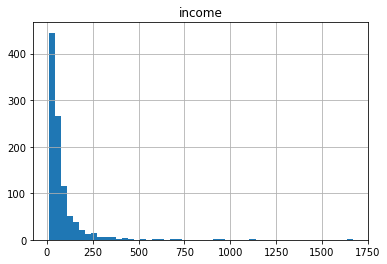

In [28]:
df.hist(column='income', bins=50)

<a name='1.5'></a>
# 3. Data Preparation for Machine Learning

<a name='1.5'></a>
## 3.1 Data Adjustment

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [16]:
df[0:3]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC


In [20]:
x = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
x[0:3]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114]], dtype=object)

As you may figure out, some features in this dataset are categorical such as Sex or BP. Unfortunately, Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. pandas.get_dummies() Convert categorical variable into dummy/indicator variables.

In [21]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
x[:,1] = le_sex.transform(x[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
x[:,2] = le_BP.transform(x[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
x[:,3] = le_Chol.transform(x[:,3]) 

x[0:9]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607],
       [49, 0, 2, 0, 16.275],
       [41, 1, 1, 0, 11.037],
       [60, 1, 2, 0, 15.171]], dtype=object)

In [11]:
y = df['Drug'].values
y[0:5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

<a name='1.5'></a>
## 3.2 Data Normalization (Standardization)

<a name='1.5'></a>
## 3.3 Data Split

In [22]:
from sklearn.model_selection import train_test_split

#70/30 split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=3)

print(f'train_x: {train_x.shape} ({round(len(train_x)/len(df), 1) * 100}%)')
print(f'train_y: {train_y.shape} ({round(len(train_y)/len(df), 1) * 100}%)')
print(f'test_x: {test_x.shape} ({round(len(test_x)/len(df), 1) * 100}%)')
print(f'test_y: {test_y.shape} ({round(len(test_y)/len(df), 1) * 100}%)')

train_x: (140, 5) (70.0%)
train_y: (140,) (70.0%)
test_x: (60, 5) (30.0%)
test_y: (60,) (30.0%)


<a name='4'></a>
# 4. Model

<a name='4'></a>
## 4.1 Train

In [23]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [32]:
drugTree.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<a name='4'></a>
## 4.2 Test

In [27]:
predTree = drugTree.predict(test_x)

<a name='5'></a>
# 5. Model Evaluation

In [30]:
print (predTree [0:9])
print (test_y [0:9])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugA' 'drugB']
['drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugA' 'drugB']


In [31]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(test_y, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


<a name='5'></a>
# 6. KNN

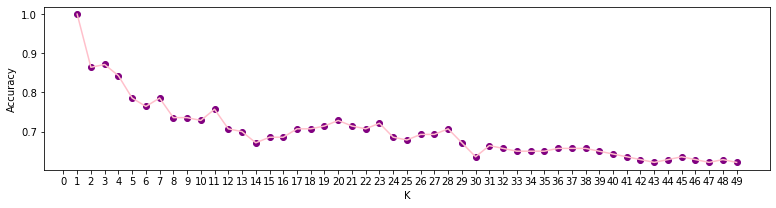

In [33]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,50)
accuracy = []
#Train Model and Predict  
for k in k_range:
    neigh = KNeighborsClassifier(n_neighbors = k).fit(train_x, train_y)
    yhat_train = neigh.predict(train_x)
    accuracy.append(metrics.accuracy_score(train_y, yhat_train))
    
plt.figure(figsize=(13,3))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.scatter(k_range, accuracy, color='purple')
plt.plot(k_range, accuracy, color='pink')
plt.xticks(range(0,50));

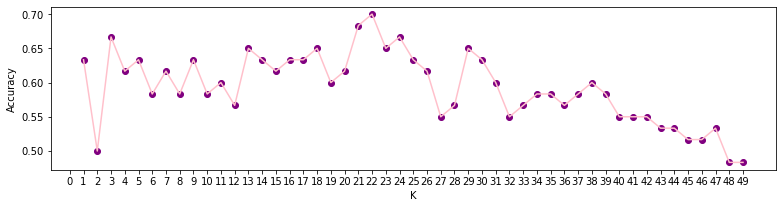

In [34]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,50)
accuracy = []
#Train Model and Predict  
for k in k_range:
    neigh = KNeighborsClassifier(n_neighbors = k).fit(train_x, train_y)
    yhat = neigh.predict(test_x)
    accuracy.append(metrics.accuracy_score(test_y, yhat))
    
plt.figure(figsize=(13,3))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.scatter(k_range, accuracy, color='purple')
plt.plot(k_range, accuracy, color='pink')
plt.xticks(range(0,50));

In [35]:
neigh = KNeighborsClassifier(n_neighbors = 22).fit(train_x,train_y)
yhat = neigh.predict(test_x)
print("Train set Accuracy: ", metrics.accuracy_score(train_y, neigh.predict(train_x)))
print("Test set Accuracy: ", metrics.accuracy_score(test_y, yhat))

Train set Accuracy:  0.7071428571428572
Test set Accuracy:  0.7
